In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    face_files = np.array(data['filenames'])
#     dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    face_targets = data['target']
    return face_files, face_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('train')
test_files, test_targets = load_dataset('test')

# load list of dog names
face_names = [item[6:-1] for item in sorted(glob("train/*/"))]
# for i in range(len(face_names)):
#     face_names[i] = face_names[i].split('.')[1]
print(face_names)
# print statistics about the dataset
print('There are %d total' % len(face_names))
print('There are %s total face images.\n' % len(np.hstack([train_files, test_files])))
print('There are %d training face images.' % len(train_files))
print('There are %d test face images.'% len(test_files))

Using TensorFlow backend.


['Adam_Herbert', 'Adam_Kennedy', 'Adam_Mair', 'Adam_Rich', 'Adam_Sandler', 'Adam_Scott', 'Adel_Al-Jubeir', 'Adelina_Avila', 'Adisai_Bodharamik', 'Adolfo_Aguilar_Zinser', 'Adolfo_Rodriguez_Saa', 'Adoor_Gopalakarishnan', 'Adrian_Annus', 'Adrian_Fernandez', 'Adrian_McPherson', 'Adrian_Murrell', 'Adrian_Nastase', 'Adriana_Lima', 'Adriana_Perez_Navarro', 'Aishwarya_rai', 'Arnold_Schwarzenegger', 'Bailey_McKnight', 'Barack_Obama', 'Bill_Simon', 'Brooklyn_McKnight', 'Chad_Smith', 'Cristina_Torrens_Valero', 'Cruz_Bustamante', 'Cuba_Gooding_Jr', 'Curt_Weldon', 'Curtis_Joseph', 'Curtis_Rodriguez', 'Curtis_Strange', 'Cyndi_Thompson', 'Cynthia_Nixon', 'Cynthia_Rowley', 'DAngelo_Jimenez', 'Dagmar_Dunlevy', 'Dai_Bachtiar', 'Dai_Chul_Chyung', 'Daisy_Fuentes', 'Daja_Bedanova', 'Dalai_Lama', 'Dale_Bosworth', 'Dale_Earnhardt', 'Dale_Earnhardt_Jr', 'Dalia_Rabin-Pelosoff', 'Damarius_Bilbo', 'Damon_Dash', 'Damon_Stoudamire', 'Damon_van_Dam', 'Dan_Ackroyd', 'Dan_Bartlett', 'Dan_Boyle', 'Dan_Bylsma', 'Dan_Di

In [3]:

from keras.preprocessing import image                  
import cv2
from PIL import Image, ImageOps, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import pandas as pd
import matplotlib.pyplot as plt
from time import time 

    


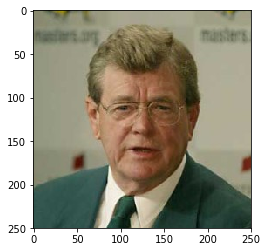

In [7]:
img = cv2.imread(train_files[60])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap = 'gray')
plt.show()
# cv2.imshow('kkk',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [8]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
#     img = py_resize(img_path)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return x

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [14]:
def py_resize(image):
    
    desired_size = 200
    im_pth = image
    im = Image.open(im_pth)
    
    old_size = im.size  # old_size[0] is in (width, height) format
    
    ratio = float(desired_size)/max(old_size)
    
    new_size = tuple([int(x*ratio) for x in old_size])
    
    # use thumbnail() or resize() method to resize the input image
    # thumbnail is a in-place operation
    im.thumbnail(new_size, Image.ANTIALIAS)
#     im = im.resize(new_size, Image.ANTIALIAS)
    # create a new image and paste the resized on it
    new_im = Image.new("L", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))


    # display(new_im)
    new_im = np.array(new_im)
    new_im = cv2.resize(new_im, None, fx = .5, fy = .5, interpolation = cv2.INTER_LINEAR)
    return new_im

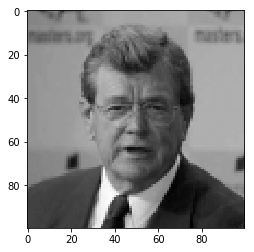

In [15]:
k = py_resize(train_files[60])
plt.imshow(k, cmap = 'gray')
plt.show()

In [16]:
train_images = []
for i in range(len(train_files)):
    k = py_resize(train_files[i]).astype('float32')/255
    train_images.append(k)
    
train_images = np.array(train_images)
train_images.shape

(1575, 100, 100)

In [72]:
test_images = []
for i in range(len(test_files)):
    k = py_resize(test_files[i]).astype('float32')/255
    test_images.append(k)

test_images = np.array(test_images)
test_images.shape

(10, 100, 100, 3)

In [17]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2


def Hog(image1):
    
    image = image1

    out, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, 
                         block_norm = 'L1', feature_vector = True, transform_sqrt = True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10), out_range=(0, 255))
    hog_image = hog_image.astype("uint8")

    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()
    return out



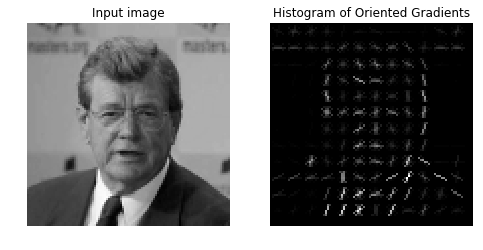

In [18]:
x = Hog(py_resize(train_files[60]))

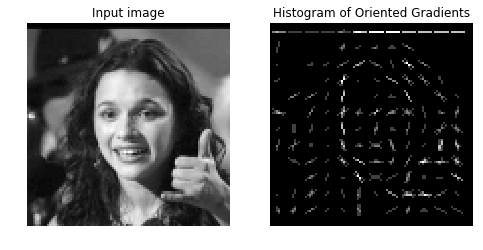

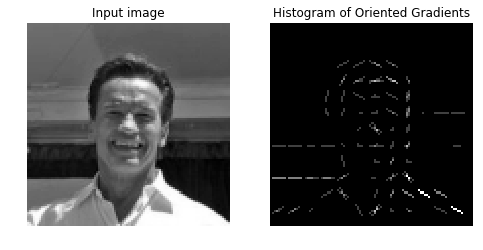

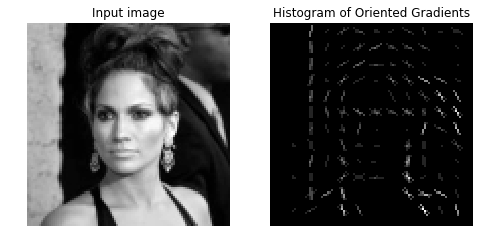

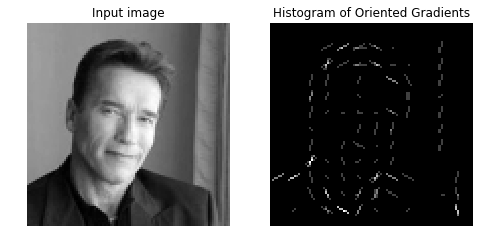

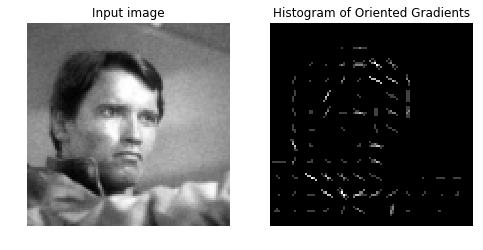

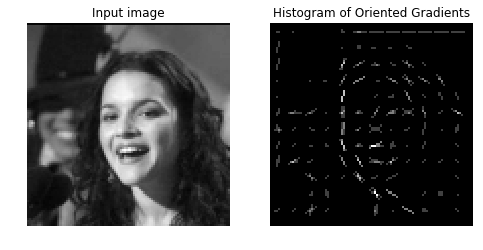

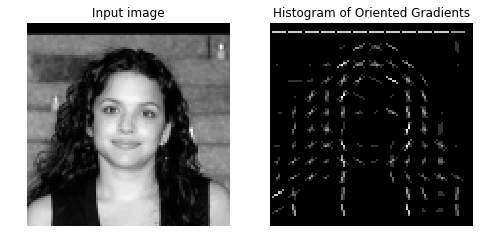

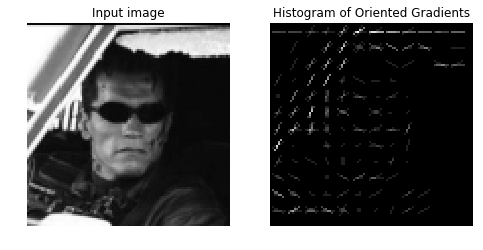

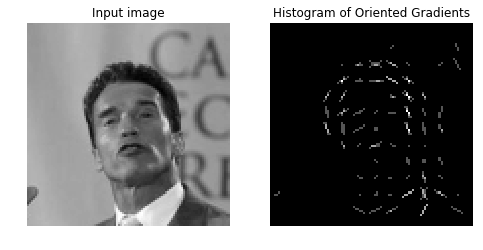

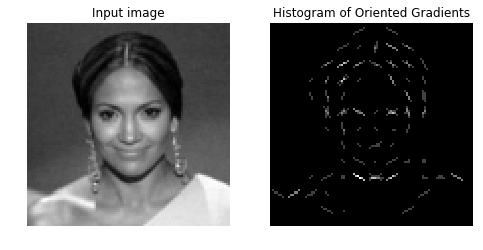

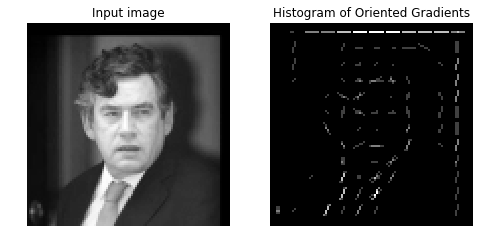

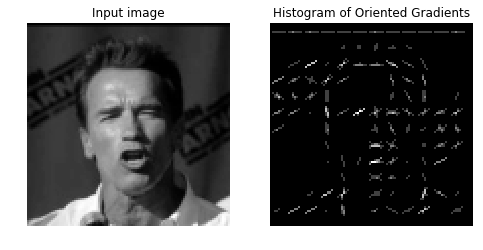

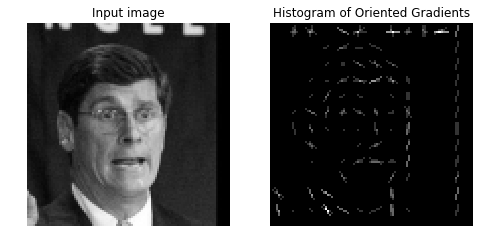

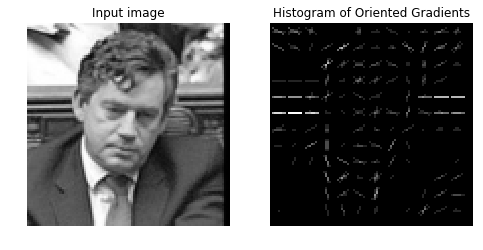

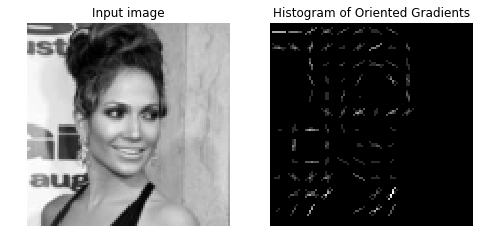

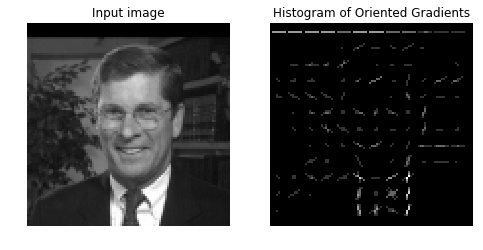

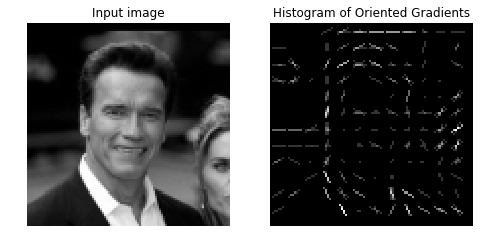

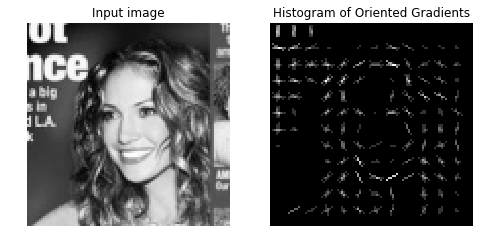

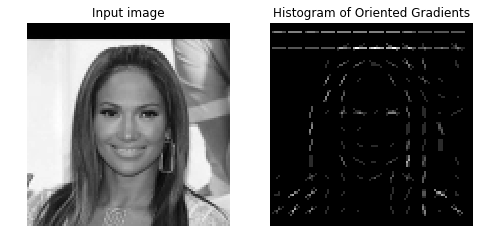

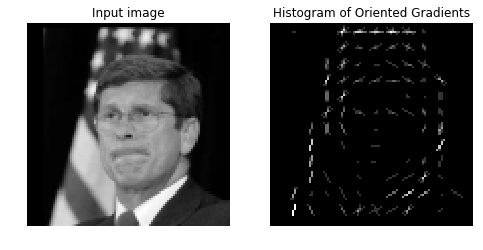

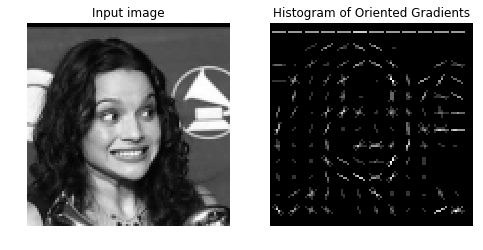

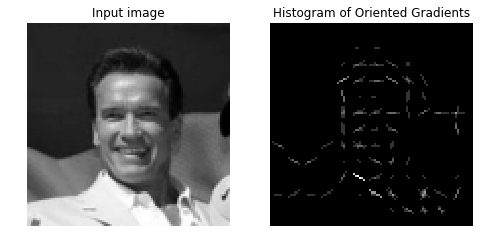

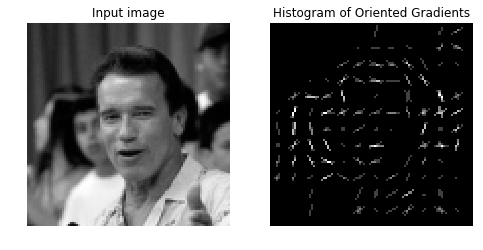

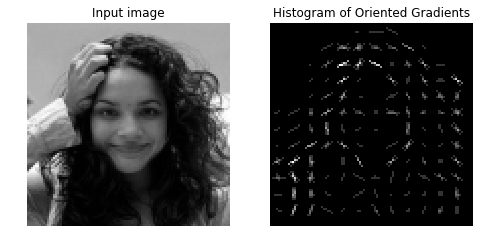

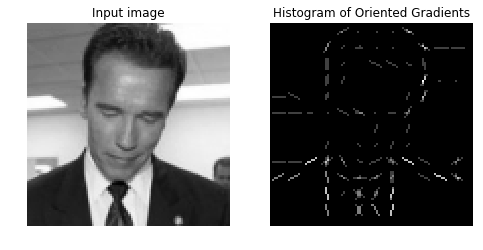

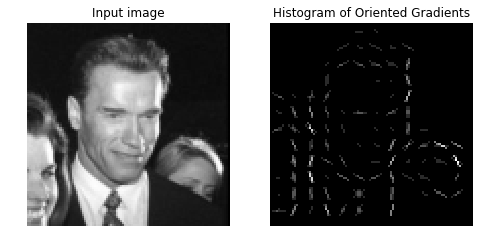

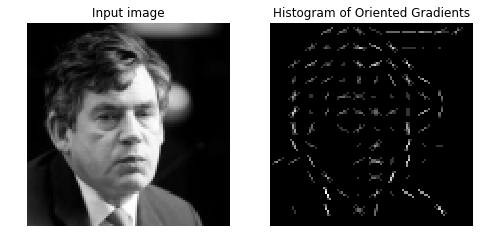

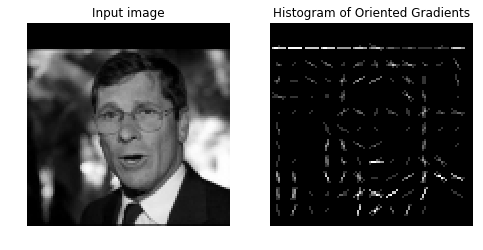

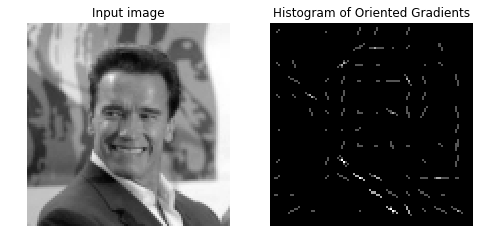

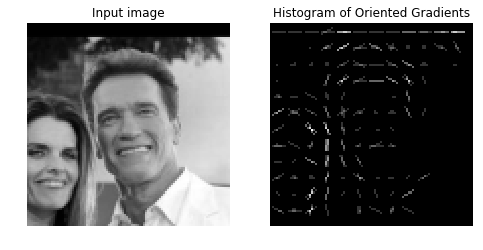

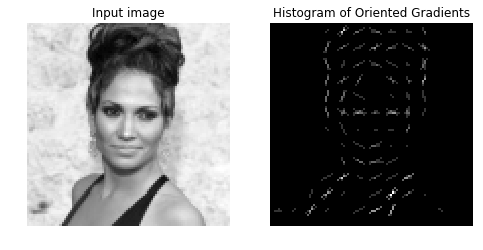

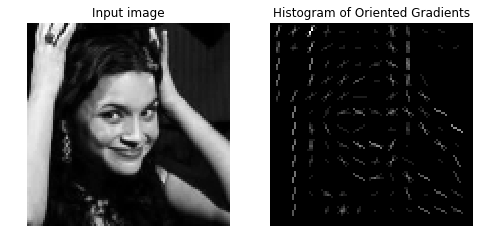

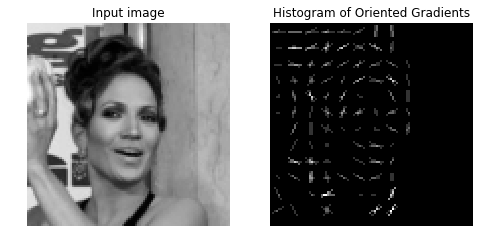

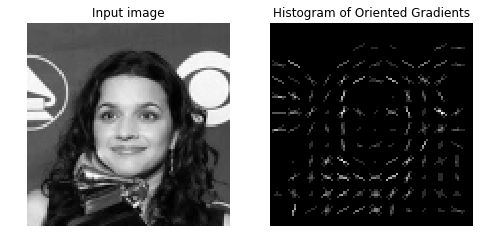

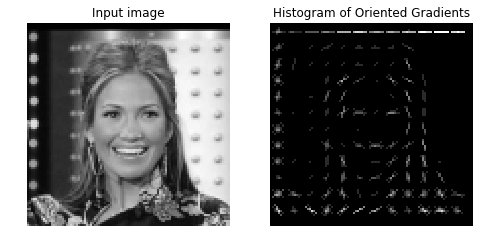

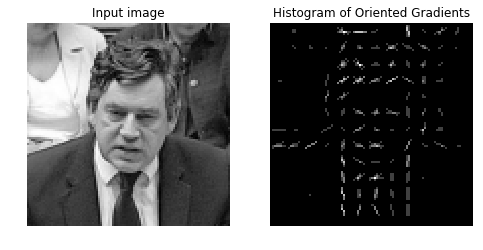

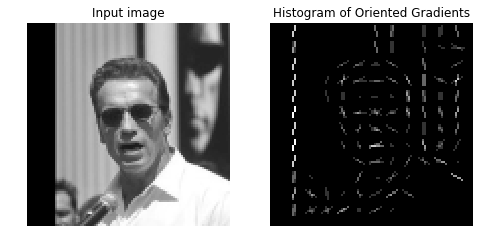

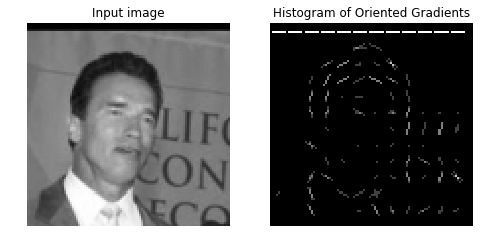

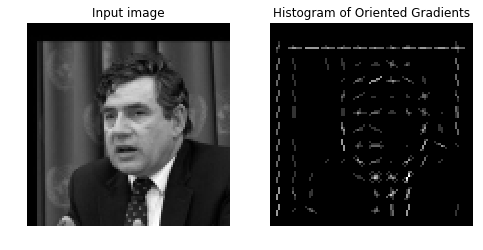

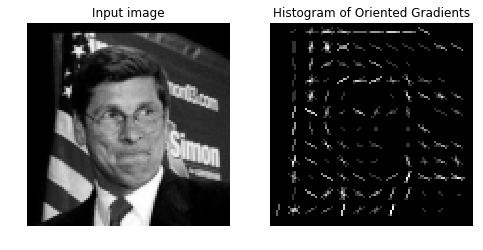

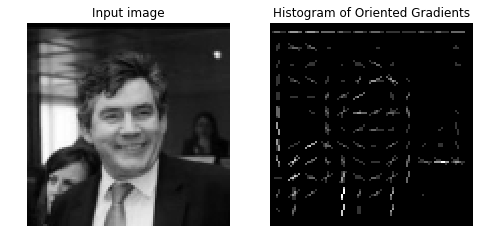

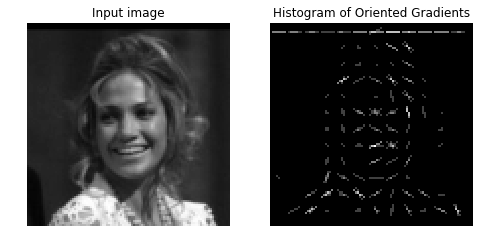

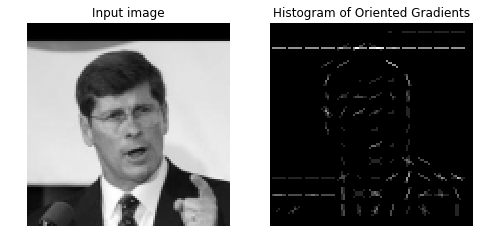

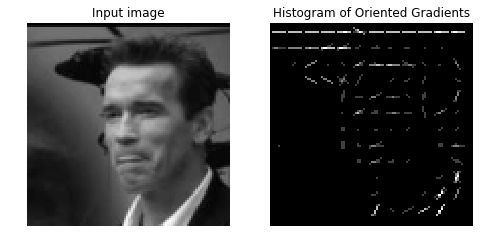

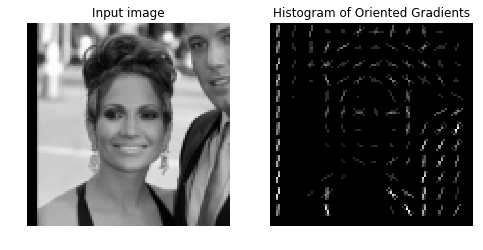

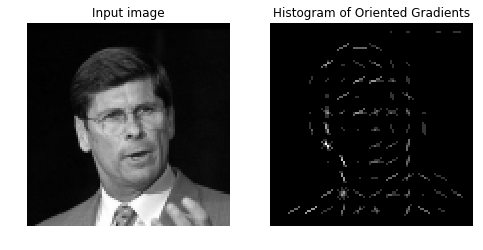

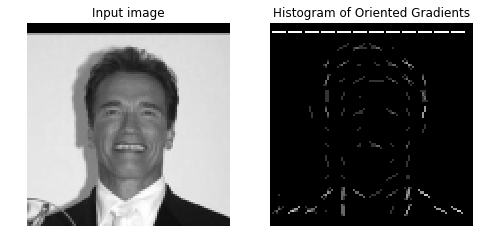

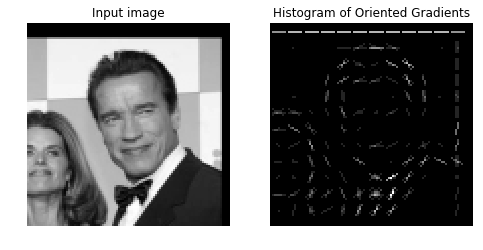

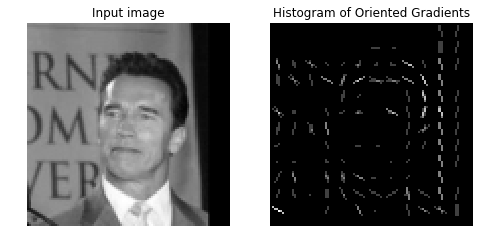

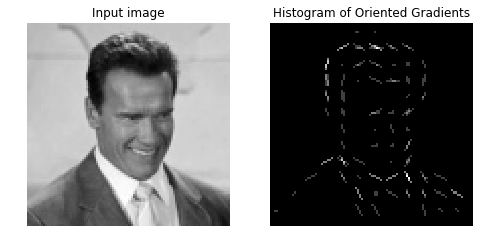

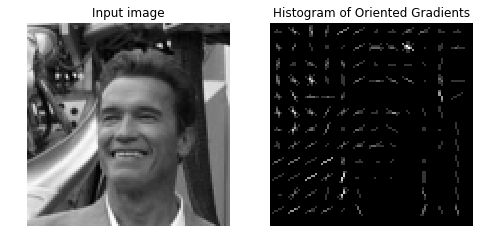

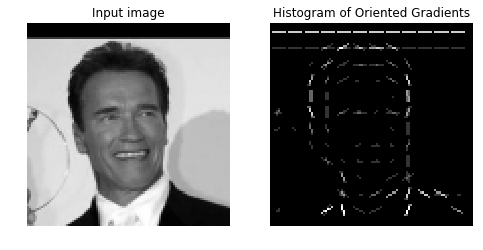

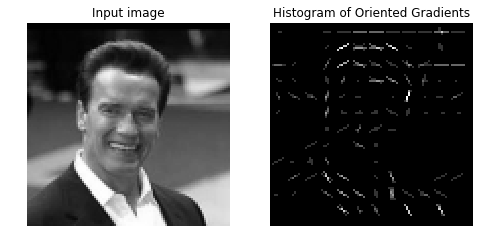

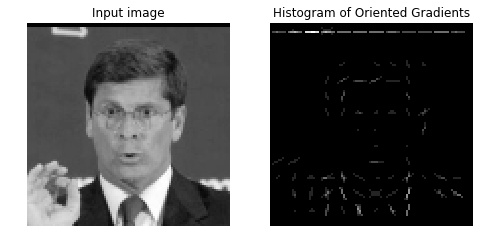

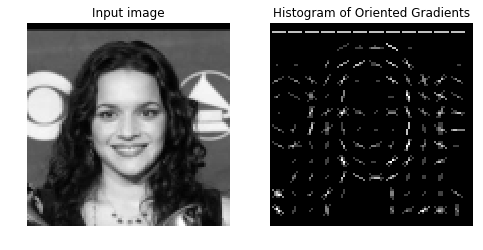

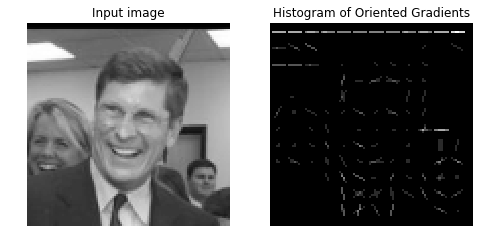

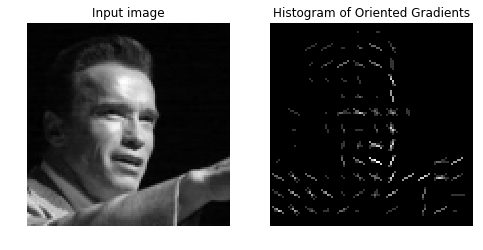

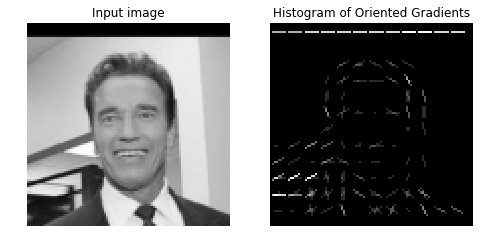

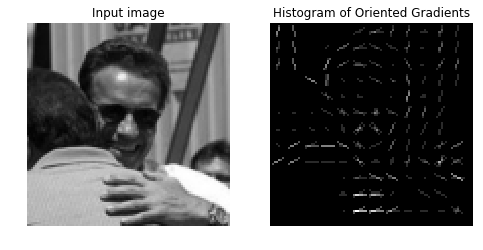

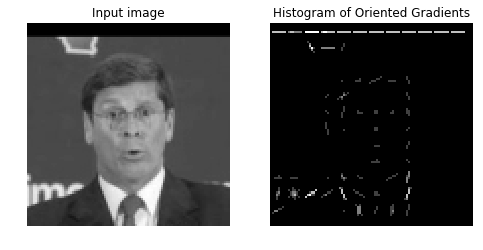

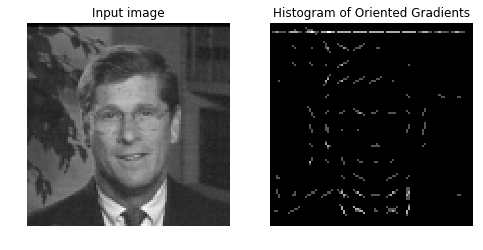

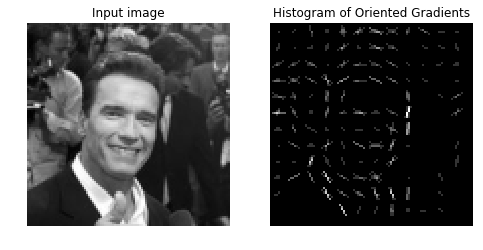

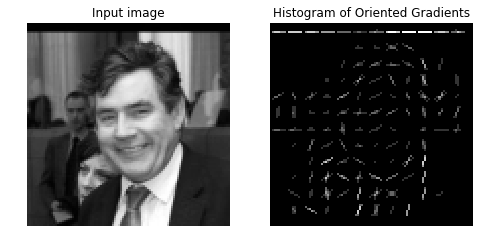

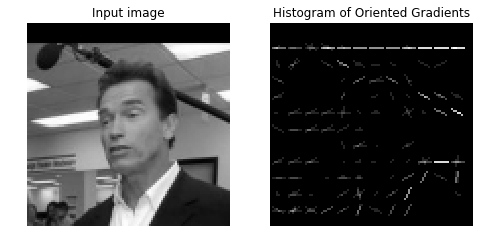

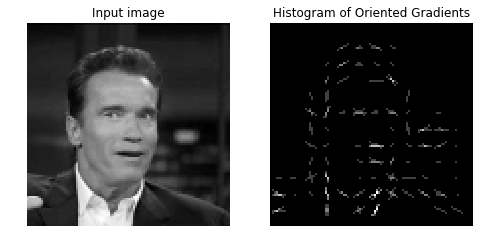

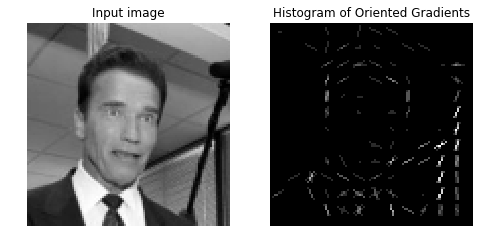

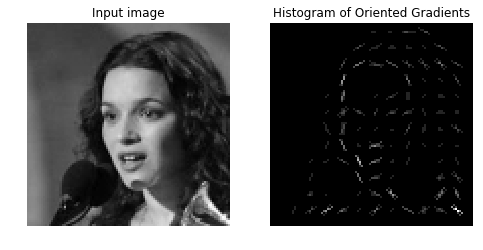

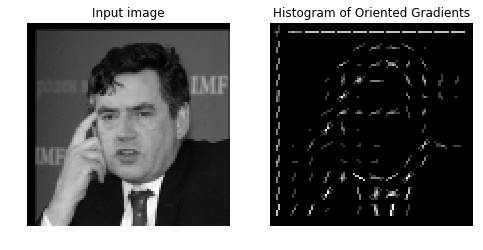

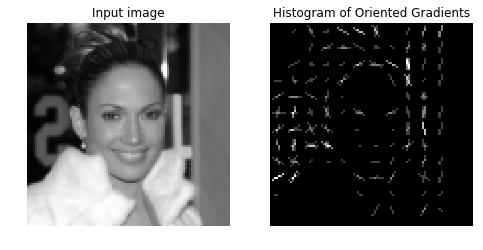

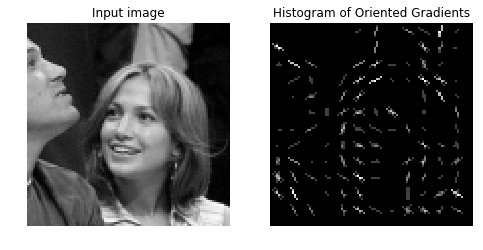

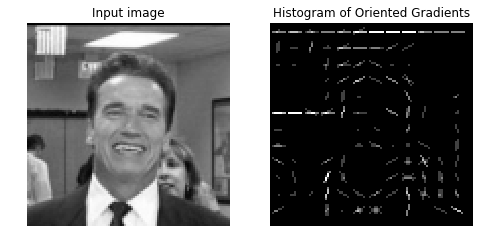

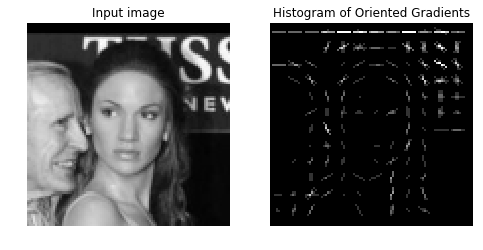

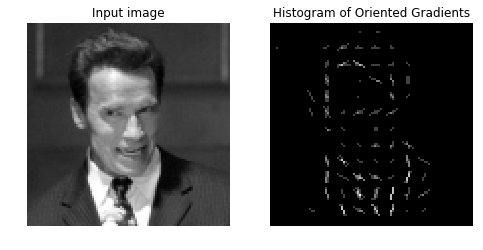

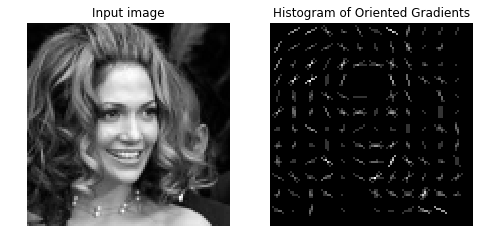

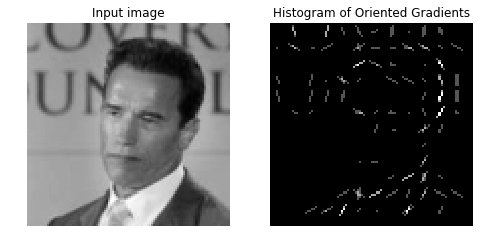

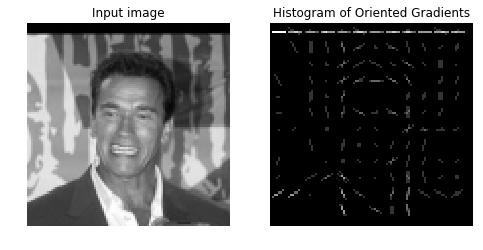

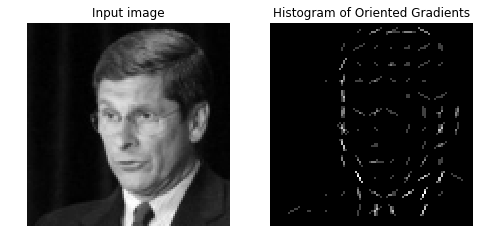

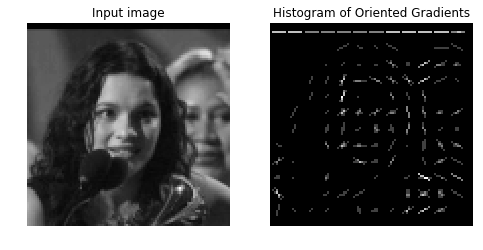

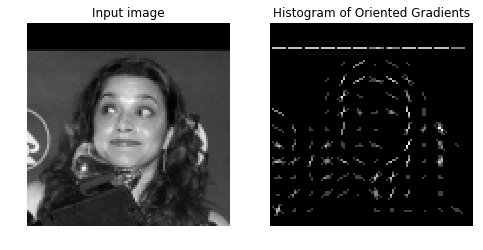

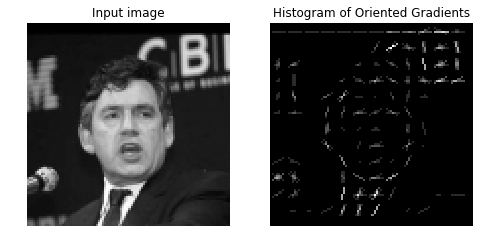

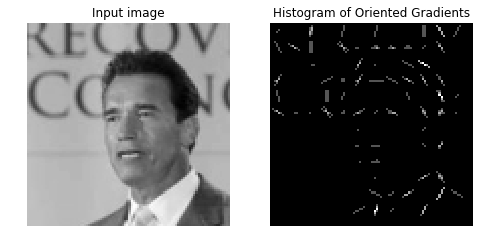

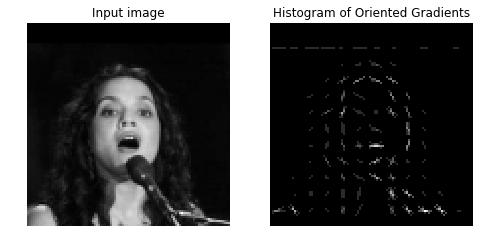

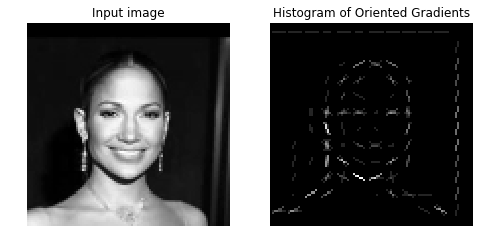

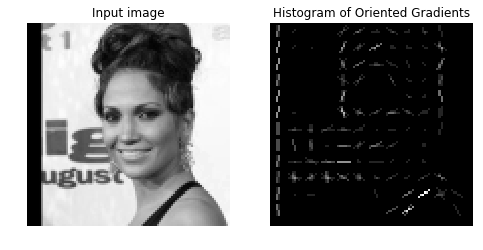

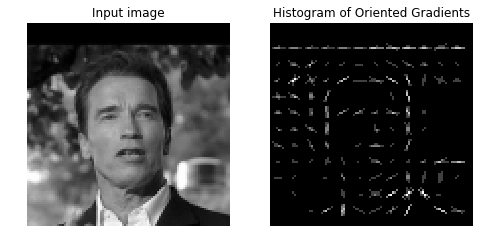

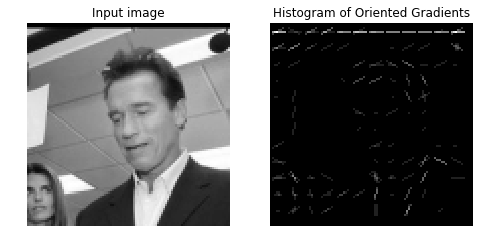

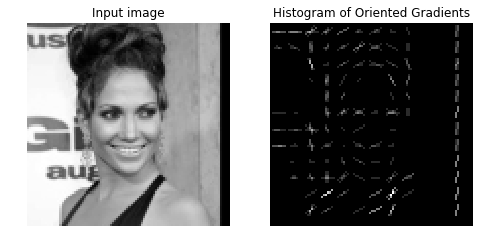

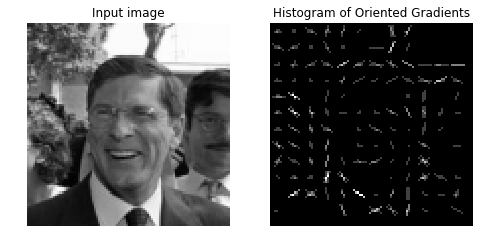

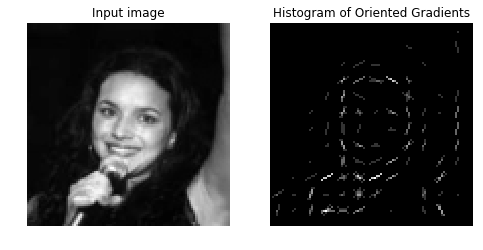

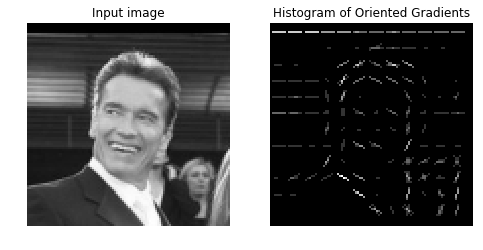

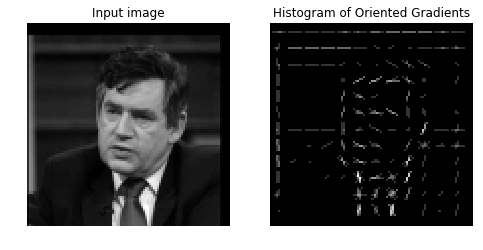

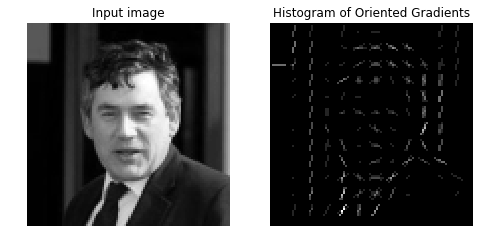

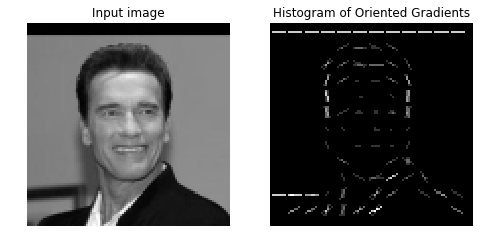

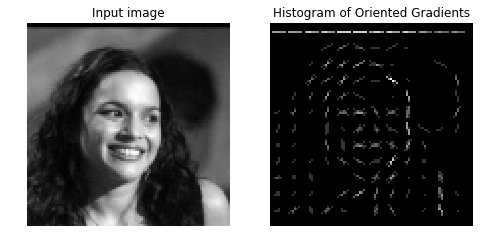

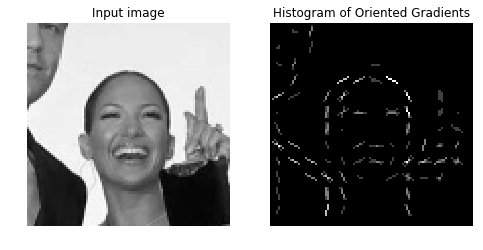

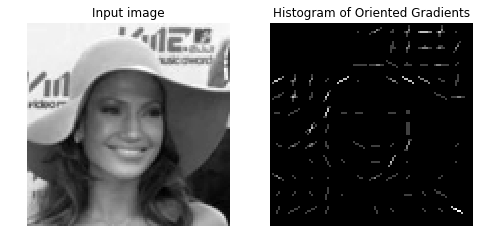

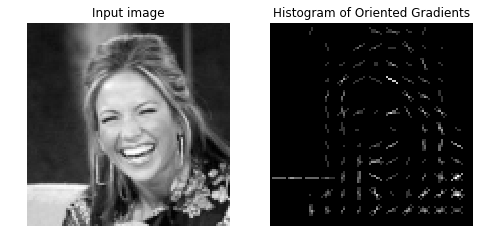

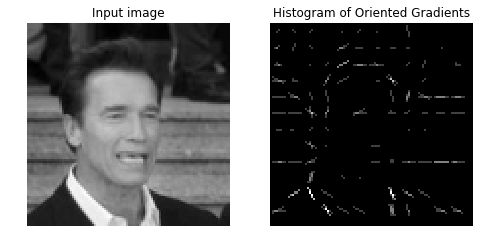

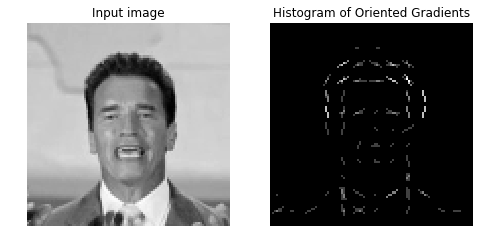

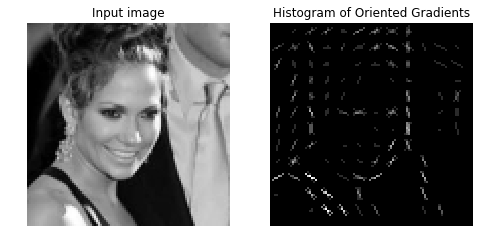

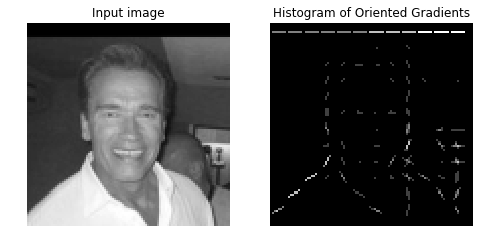

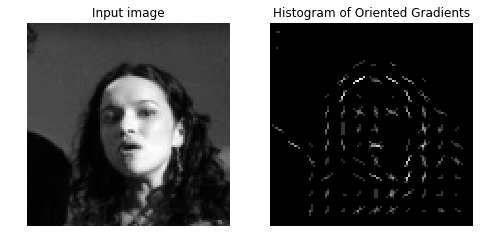

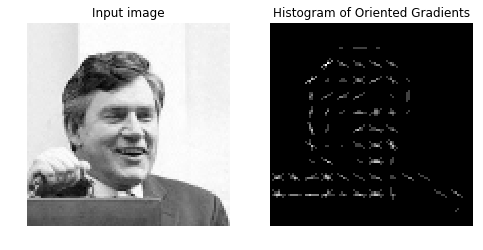

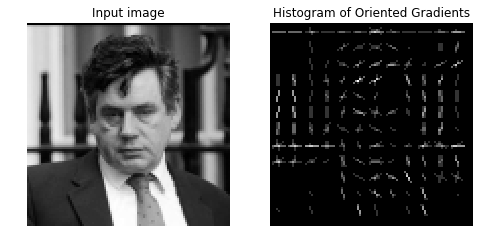

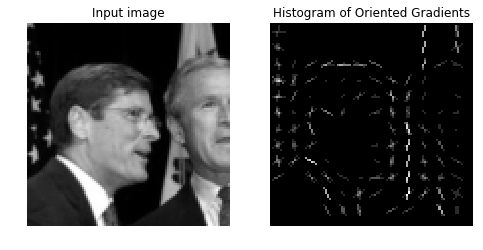

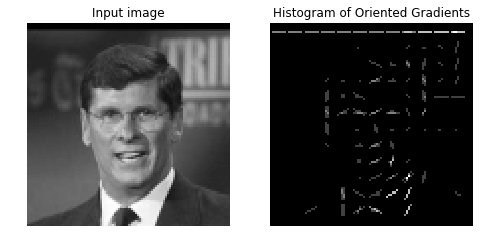

In [74]:
hog_features = []

for i in range(len(train_images)):
    hog_features.append(Hog(train_images[i]))
    
hog_train = np.array(hog_features)  


In [40]:
hog_train.shape

(106, 4356)

In [41]:
hog_test = []

for i in range(len(test_images)):
    hog_test.append(Hog(test_images[i]))
    
hog_test = np.array(hog_test)
hog_test.shape

(10, 4356)

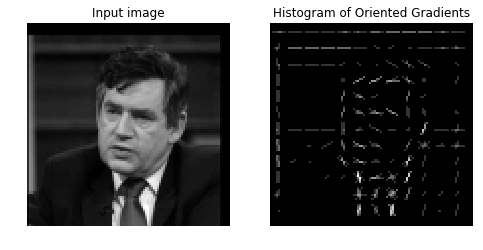

In [48]:
k = Hog(train_images[90])

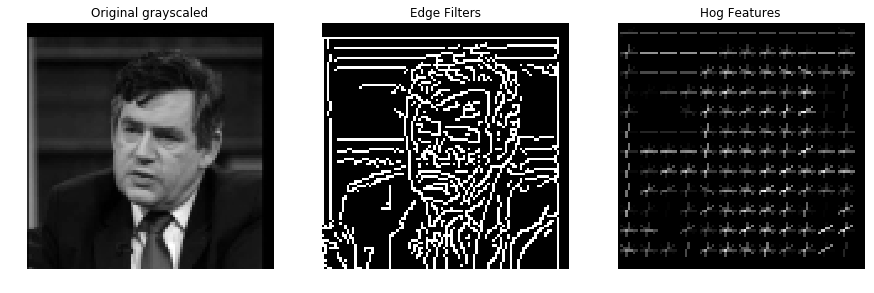

(4356,)

In [55]:
# make = imagePath.split("/")[-2]

import imutils
from skimage.feature import hog
from skimage import data, exposure

def Hog_edge(img1):

    # load the image, convert it to grayscay
    
    original = py_resize(img1)
    edged = imutils.auto_canny(original)

    #  extract Histogram of Oriented Gradients from the logo
    H, img = hog(edged, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), transform_sqrt=True, 
                 feature_vector = True, visualize = True, block_norm="L1")

    img = exposure.rescale_intensity(img, out_range = (0, 255))

    fig = plt.figure(figsize=(15, 15))
    images = ("Original grayscaled", original), ("Edge Filters", edged), ("Hog Features", img)

    # loop over the images
    for (i, (name, image)) in enumerate(images):
        # show the image
        ax = fig.add_subplot(1, 3, i + 1)
        ax.set_title(name)
        plt.imshow(image, cmap = 'gray')
        plt.axis("off")
 
    #show the figure
    plt.show()
    
    return H

p = Hog_edge(train_files[90])
 
p.shape 


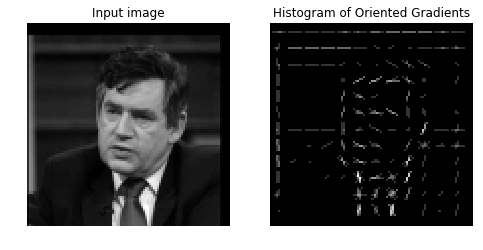

In [56]:
k = Hog(train_images[90])

In [57]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

In [58]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
# param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf = GridSearchCV(LinearSVC(random_state=0),
                       param_grid={'C': [0.01, 0.02, 0.03, 0.1]},
                       cv=5)

# clf_best = LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
#      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
#      multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
#      verbose=0)

# clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
#                    param_grid, cv=5)

# clf = clf.fit(X_train_pca, train_targets)
clf = clf.fit(hog_train, train_targets)

# clf_best = clf_best.fit(X_train_pca, train_targets)
# clf_best = clf_best.fit(hog_edge_train, train_targets)

print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 3.579s
Best estimator found by grid search:
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)


In [59]:
# Quantitative evaluation of the model quality on the test set
# n = 1000
# print("Predicting dog's breeds on the test set")
t0 = time()
# y_pred = clf.predict(X_test_pca)
y_pred = clf.predict(hog_test)

print("done in %0.3fs" % (time() - t0))

print(classification_report(test_targets, y_pred, target_names=face_names))
# print(confusion_matrix(test_targets, y_pred, labels=range(7)))
print("Accuracy Score:",np.round(accuracy_score(test_targets, y_pred)*100, 2))

done in 0.001s


C:\Users\sahit\Anaconda3\envs\cnn\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                       precision    recall  f1-score   support

Arnold_Schwarzenegger       0.25      0.50      0.33         2
           Bill_Simon       0.00      0.00      0.00         2
         Gordon_Brown       0.40      1.00      0.57         2
       Jennifer_Lopez       0.00      0.00      0.00         2
          Norah_Jones       1.00      0.50      0.67         2

          avg / total       0.33      0.40      0.31        10

Accuracy Score: 40.0
